In [ ]:
# Environment Setup and Data Loading
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import sys
import site
import os

# Check the kernel with these if having issues with the environment
#print("Python executable:", sys.executable)
#print("Python version:", sys.version)
#print("Site packages:", site.getsitepackages())


# Jupyter Notebook depedendency
# %matplotlib inline

data = './diabetes_data.csv'

# Check existence of file
if os.path.exists(data):
    print("Data has been loaded.")
else:
    print("An error while loading the file occurred. Check the file path.")

# Data load
try:
    # Assume the first line are the headers and save them in a list
    df = pd.read_csv(data, header=0)
    col_names = df.columns.tolist()
    print("Headers:", col_names)
    print(df.head())
except Exception as e:
    print(f"An error while loading the file occurred: {e}")


Data has been loaded.
Headers: ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']
   Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
0    4    1         0          1   26       0                     0   
1   12    1         1          1   26       1                     0   
2   13    1         0          1   26       0                     0   
3   11    1         1          1   28       1                     0   
4    8    0         0          1   29       1                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0             1       0        1                  0        3         5   
1             0       1        0                  0        3         0   
2             1       1        1                  0        1         0   
3             1       1     

In [3]:
df.shape

(70692, 18)

In [4]:
#get column names and also informations about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int64
 1   Sex                   70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   HeartDiseaseorAttack  70692 non-null  int64
 7   PhysActivity          70692 non-null  int64
 8   Fruits                70692 non-null  int64
 9   Veggies               70692 non-null  int64
 10  HvyAlcoholConsump     70692 non-null  int64
 11  GenHlth               70692 non-null  int64
 12  MentHlth              70692 non-null  int64
 13  PhysHlth              70692 non-null  int64
 14  DiffWalk              70692 non-null  int64
 15  Stroke                70692 non-null  int64
 16  High

In [6]:
#check unique values

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose().sort_values(by='unique value count', ascending=False)

,unique value count
BMI,80
PhysHlth,31
MentHlth,31
Age,13
GenHlth,5
HvyAlcoholConsump,2
HighBP,2
Stroke,2
DiffWalk,2
Veggies,2


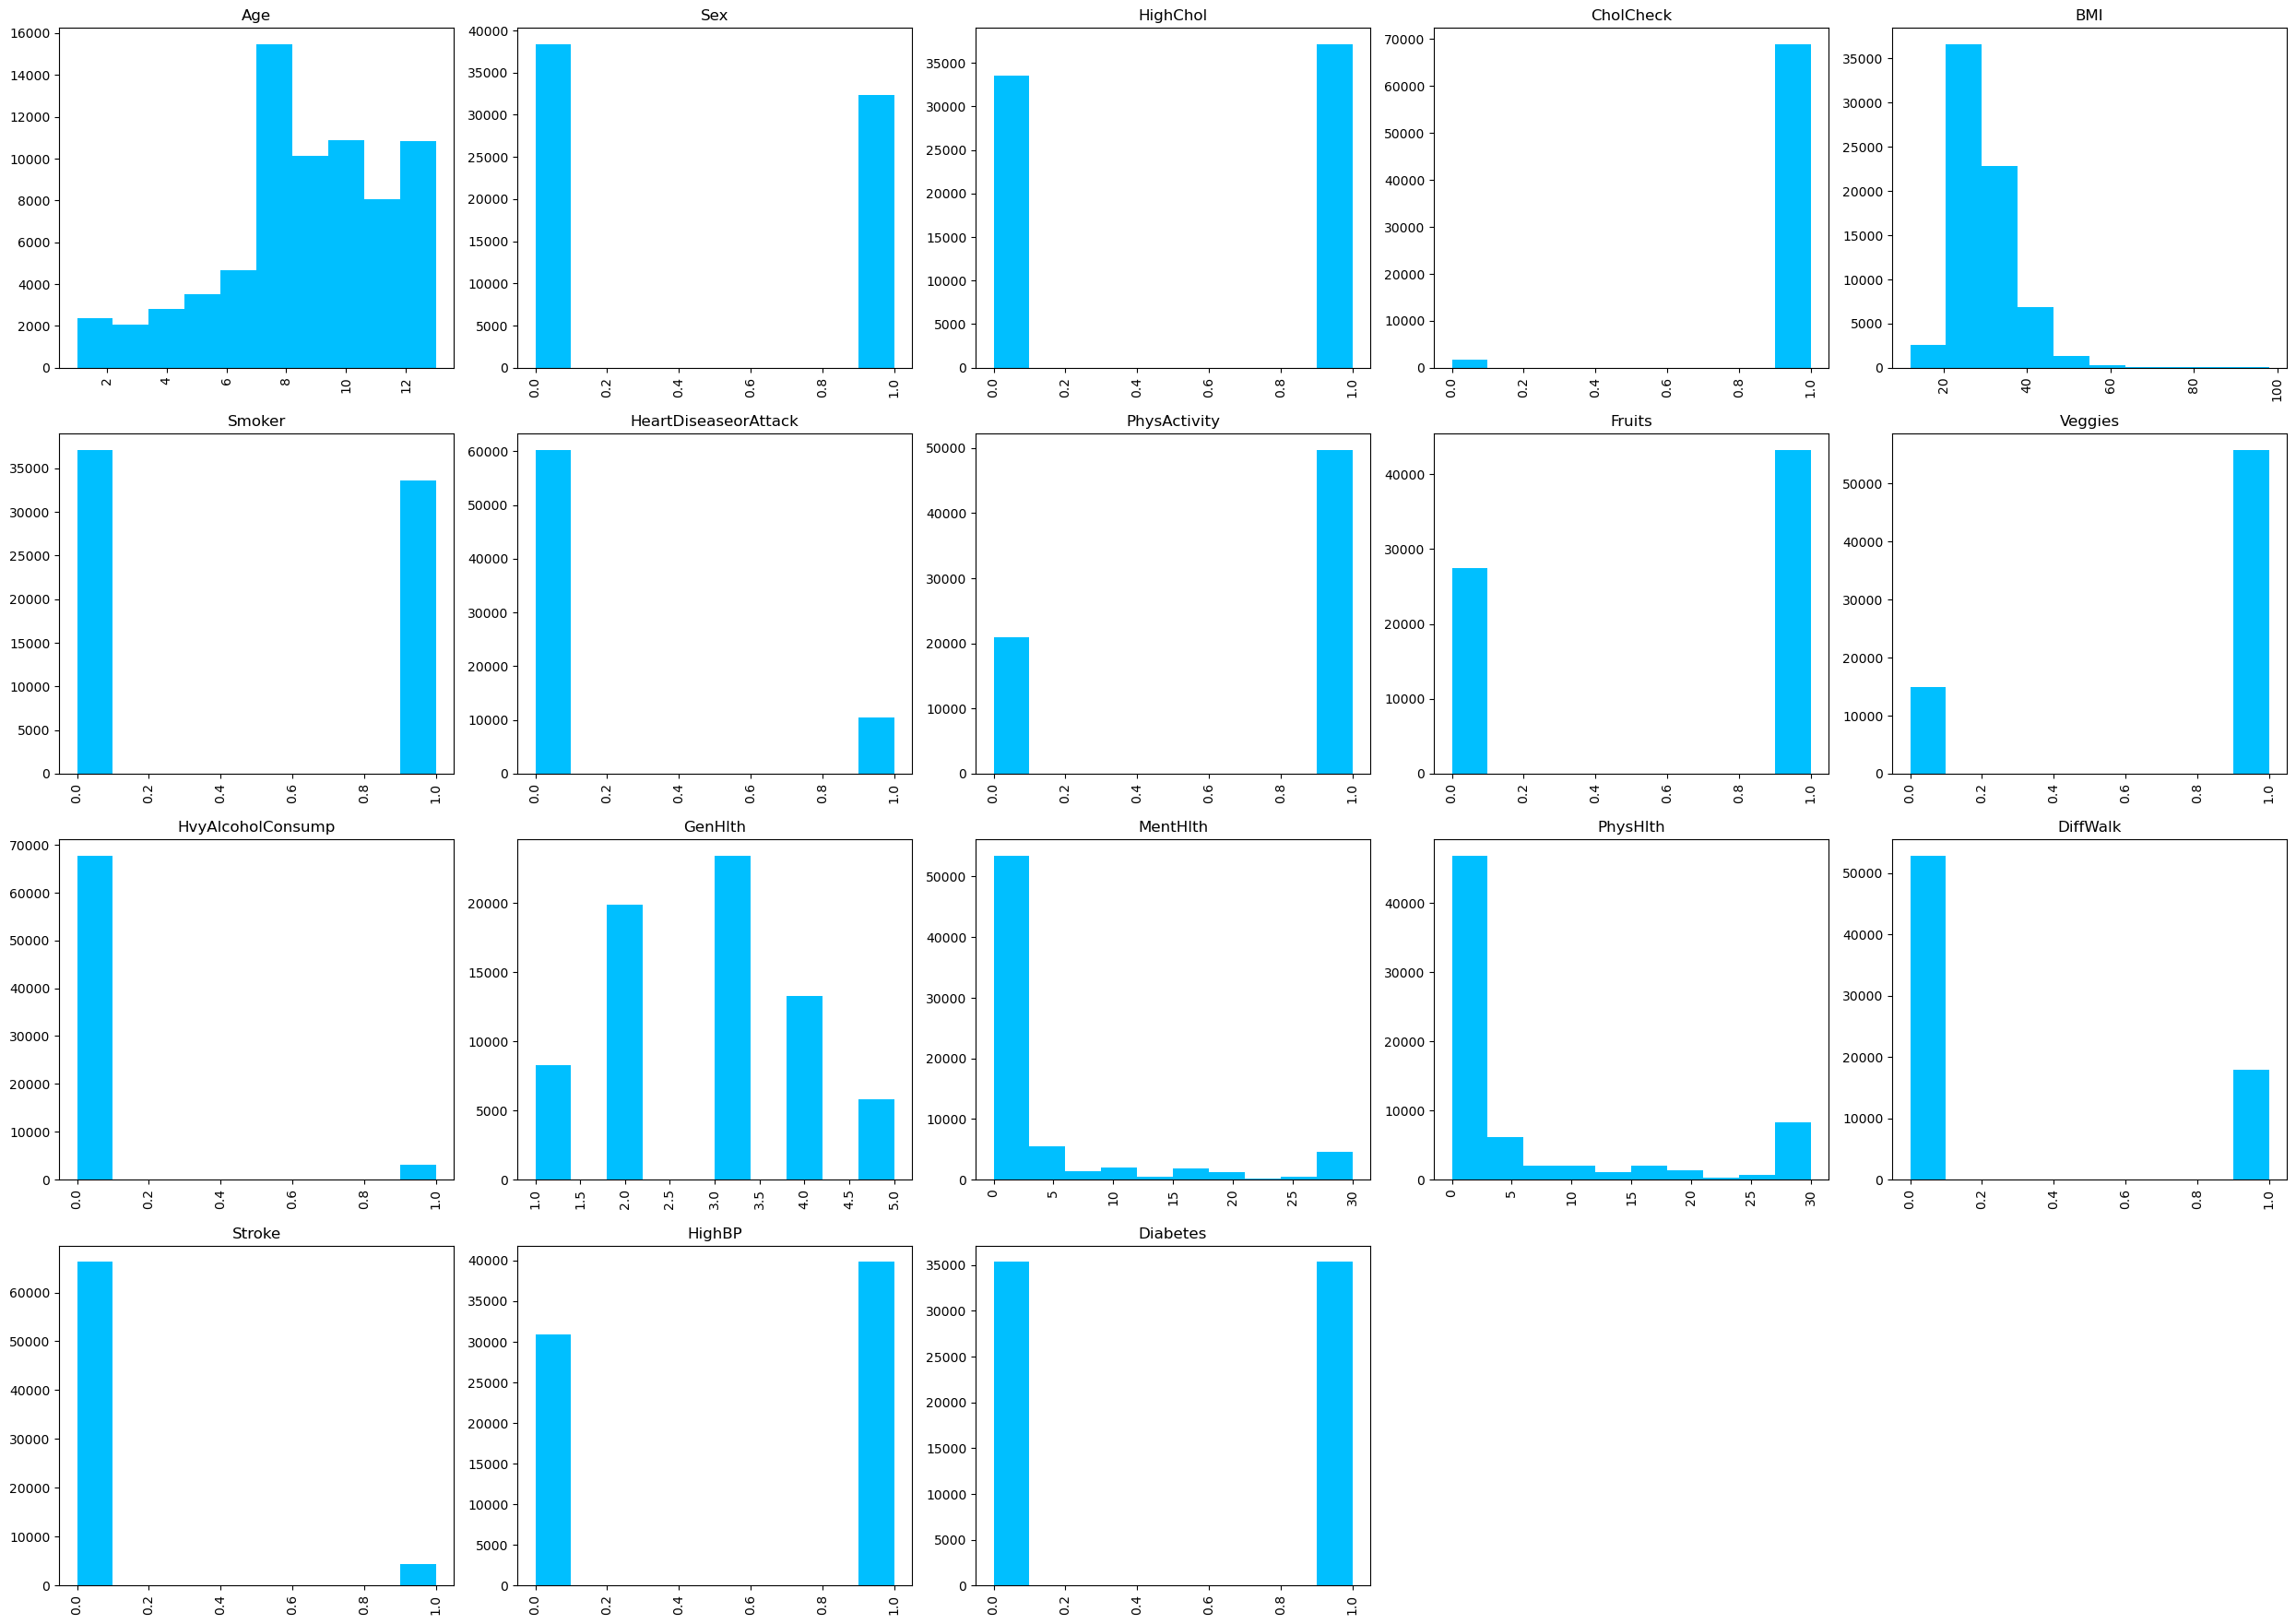

In [7]:
#check frequency of all values in the column

feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

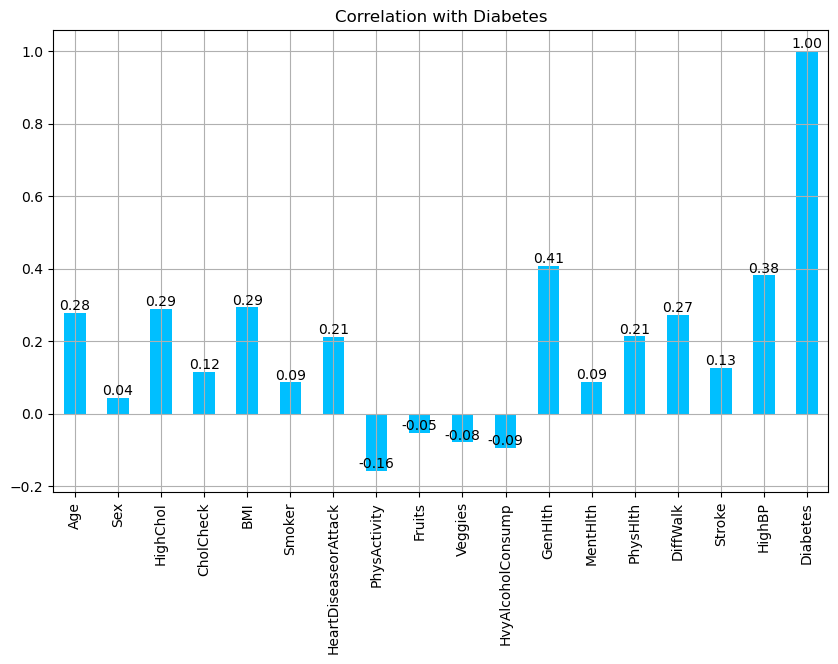

In [10]:
# check correlation of other columns with diabetes column with Pearson Correlation
numerical_cols = df.select_dtypes(include=['number']).columns
ax = df[numerical_cols].corrwith(df['Diabetes']).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes", color="deepskyblue");
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


In [ ]:
### Variables with correlation less than 0.1 are Sex, Smoker, Fruits, Veggies, HvyAlcoholConsump, MentHlth.

<Axes: title={'center': 'Feature Correlation Heatmap'}>

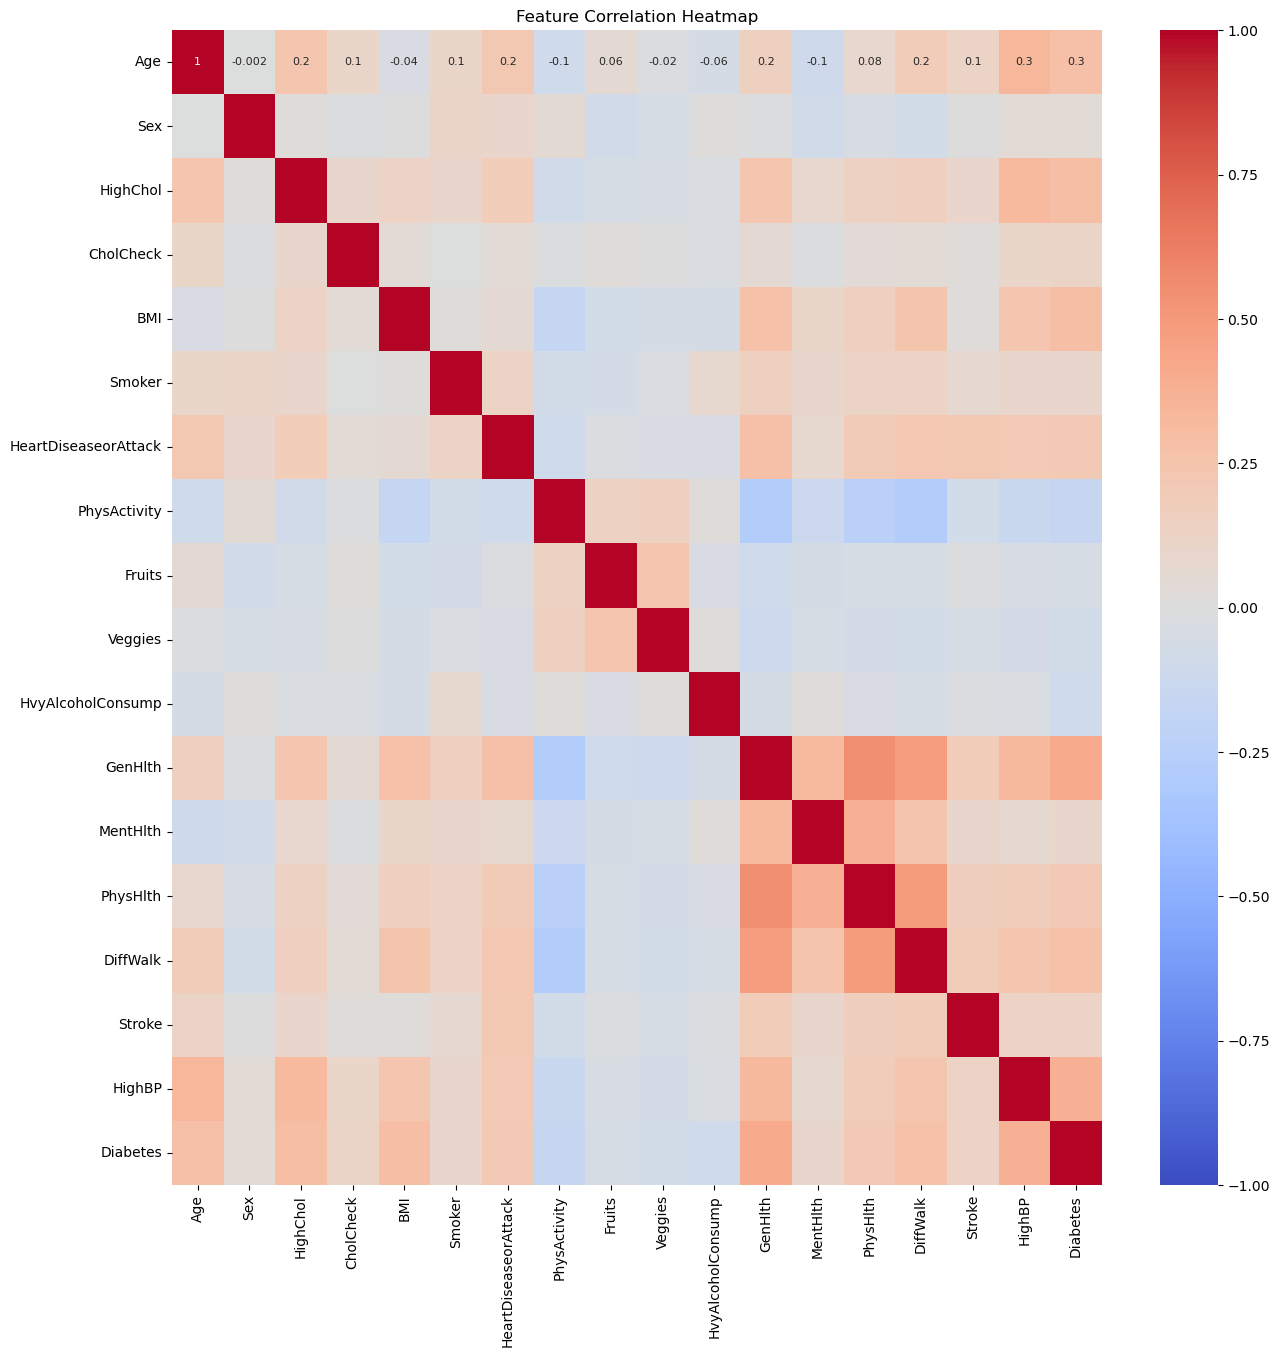

In [31]:
# Correlation between any two features
# check for possible co-variates

#sns.set(rc = {'figure.figsize':(10,10)})
#sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

### The seaborn .set is deprecated duo to changes in seaborn api. We can use the following instead 

plt.figure(figsize=(15,15))
plt.title('Feature Correlation Heatmap')
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, fmt='.1g', cmap='coolwarm')



In [32]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0


In [18]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
#Data splitting
# split X and y into training and testing sets

#This approach is a fixed one


y = (df['Diabetes']).astype(int)
X = df.loc[:, df.columns != 'Diabetes']  # everything except "diabetes"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% train 

In [34]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6,0,1,1,37,0,0,0,0,1,0,4,0,0,0,0,0,1
70688,10,1,1,1,29,1,1,0,1,1,0,2,0,0,1,0,0,1
70689,13,0,1,1,25,0,1,0,1,0,0,5,15,0,1,0,1,1
70690,11,0,1,1,18,0,0,0,0,0,0,4,0,0,1,0,1,1


In [101]:
X_test.shape

(14139, 17)

In [102]:
X_train.dtypes

Age                     int64
Sex                     int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Stroke                  int64
HighBP                  int64
dtype: object

In [103]:
X_train.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
61789,11,1,0,1,25,0,0,1,0,1,0,4,0,3,0,0,1
46280,11,0,1,1,27,1,1,0,0,0,0,5,0,30,1,0,1
18465,8,0,0,1,27,1,0,1,0,0,0,4,10,27,1,0,1
45540,12,0,1,1,25,0,0,1,0,0,0,3,0,0,0,0,0
28119,5,0,1,1,26,1,0,1,0,0,1,3,0,2,1,0,1


In [104]:
X_test.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
44967,10,0,1,1,23,1,0,1,0,1,0,4,0,0,0,0,0
20220,13,0,0,1,33,1,0,0,1,1,0,3,0,3,1,0,0
23944,8,1,1,1,27,1,0,1,1,1,0,2,0,5,0,0,1
2707,7,1,1,1,29,1,0,0,1,0,0,3,0,5,0,0,0
42356,6,1,0,1,47,0,0,1,1,1,0,4,30,10,1,0,1


In [ ]:
# This approach is a fixed one

#DecisionTreeClassifier instance with model with gini index/impurity 
#random_state keeps the same state every run | max_depth is the maximum depth of the tree
# from sklearn.tree import DecisionTreeClassifier
# clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)

# Train/fit the model
# X_train is the input, and y_train is the output
# clf_gini.fit(X_train, y_train)


# This approach is a dynamic one using hyperparameter tuninng
# Parameters to tune: max_depth, min_samples_split, min_samples_leaf, criterion.


param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Update clf_gini with best model
clf_gini = grid_search.best_estimator_

# This tests multiple configurations across 5-fold cross-validation, selecting the best-performing model. Use this tuned clf_gini for subsequent steps.



Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.739766237743733


In [108]:
# Ablation testing
# Test different depths and constraints to simulate adding/removing layers.
from sklearn.metrics import accuracy_score

depths = [1, 3, 5, 7, None]  # None = no limit on depth
results = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((depth, acc))
for depth, acc in results:
    print(f"Max Depth: {depth}, Test Accuracy: {acc:.4f}")

Max Depth: 1, Test Accuracy: 0.6863
Max Depth: 3, Test Accuracy: 0.7162
Max Depth: 5, Test Accuracy: 0.7352
Max Depth: 7, Test Accuracy: 0.7385
Max Depth: None, Test Accuracy: 0.6581


In [109]:
# Scalability testing
#test training time with dataset size or tree depth.

import time
import numpy as np

sizes = [0.25, 0.5, 0.75, 1.0]  # Fractions of training data
depths = [3, 5, 10]
times = []

for size in sizes:
    for depth in depths:
        X_subset = X_train.sample(frac=size, random_state=42)
        y_subset = y_train.loc[X_subset.index]
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        start = time.time()
        clf.fit(X_subset, y_subset)
        end = time.time()
        times.append((size, depth, end - start))
for size, depth, t in times:
    print(f"Data Fraction: {size}, Depth: {depth}, Time: {t:.4f} seconds")

Data Fraction: 0.25, Depth: 3, Time: 0.0117 seconds
Data Fraction: 0.25, Depth: 5, Time: 0.0157 seconds
Data Fraction: 0.25, Depth: 10, Time: 0.0302 seconds
Data Fraction: 0.5, Depth: 3, Time: 0.0200 seconds
Data Fraction: 0.5, Depth: 5, Time: 0.0289 seconds
Data Fraction: 0.5, Depth: 10, Time: 0.0542 seconds
Data Fraction: 0.75, Depth: 3, Time: 0.0307 seconds
Data Fraction: 0.75, Depth: 5, Time: 0.0503 seconds
Data Fraction: 0.75, Depth: 10, Time: 0.0766 seconds
Data Fraction: 1.0, Depth: 3, Time: 0.0397 seconds
Data Fraction: 1.0, Depth: 5, Time: 0.0703 seconds
Data Fraction: 1.0, Depth: 10, Time: 0.1059 seconds


In [110]:
# Stratified K-Folds with 10 runs on Dataset 1


metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
for seed in range(10):  # Note 1: 10 runs
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)  # Note 2
    for train_idx, test_idx in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
        
        # Note 3: 90/10 validation split
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_fold, y_train_fold, 
                                                                  test_size=0.1, random_state=seed, 
                                                                  stratify=y_train_fold)
        
        clf = DecisionTreeClassifier(**grid_search.best_params_, random_state=seed)
        clf.fit(X_train_sub, y_train_sub)
        y_pred = clf.predict(X_test_fold)
        
        metrics['accuracy'].append(accuracy_score(y_test_fold, y_pred))
        report = classification_report(y_test_fold, y_pred, output_dict=True)
        metrics['precision'].append(report['1']['precision'])
        metrics['recall'].append(report['1']['recall'])
        metrics['f1'].append(report['1']['f1-score'])

# Note 5: Mean and Std
for metric, values in metrics.items():
    print(f"{metric.capitalize()} - Mean: {np.mean(values):.4f}, Std: {np.std(values):.4f}")

Accuracy - Mean: 0.7405, Std: 0.0038
Precision - Mean: 0.7221, Std: 0.0088
Recall - Mean: 0.7825, Std: 0.0171
F1 - Mean: 0.7509, Std: 0.0047


In [111]:
#  Standard Evaluation Metrics

y_pred_gini = clf_gini.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_gini, target_names=['No Diabetes', 'Diabetes']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gini))

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.77      0.69      0.73      7090
    Diabetes       0.72      0.79      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139

Confusion Matrix:
[[4875 2215]
 [1483 5566]]


In [112]:
# Compare with State-of-the-Art Models


# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Compare accuracies
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy: 0.7384539217766461
Random Forest Accuracy: 0.7274206096612207


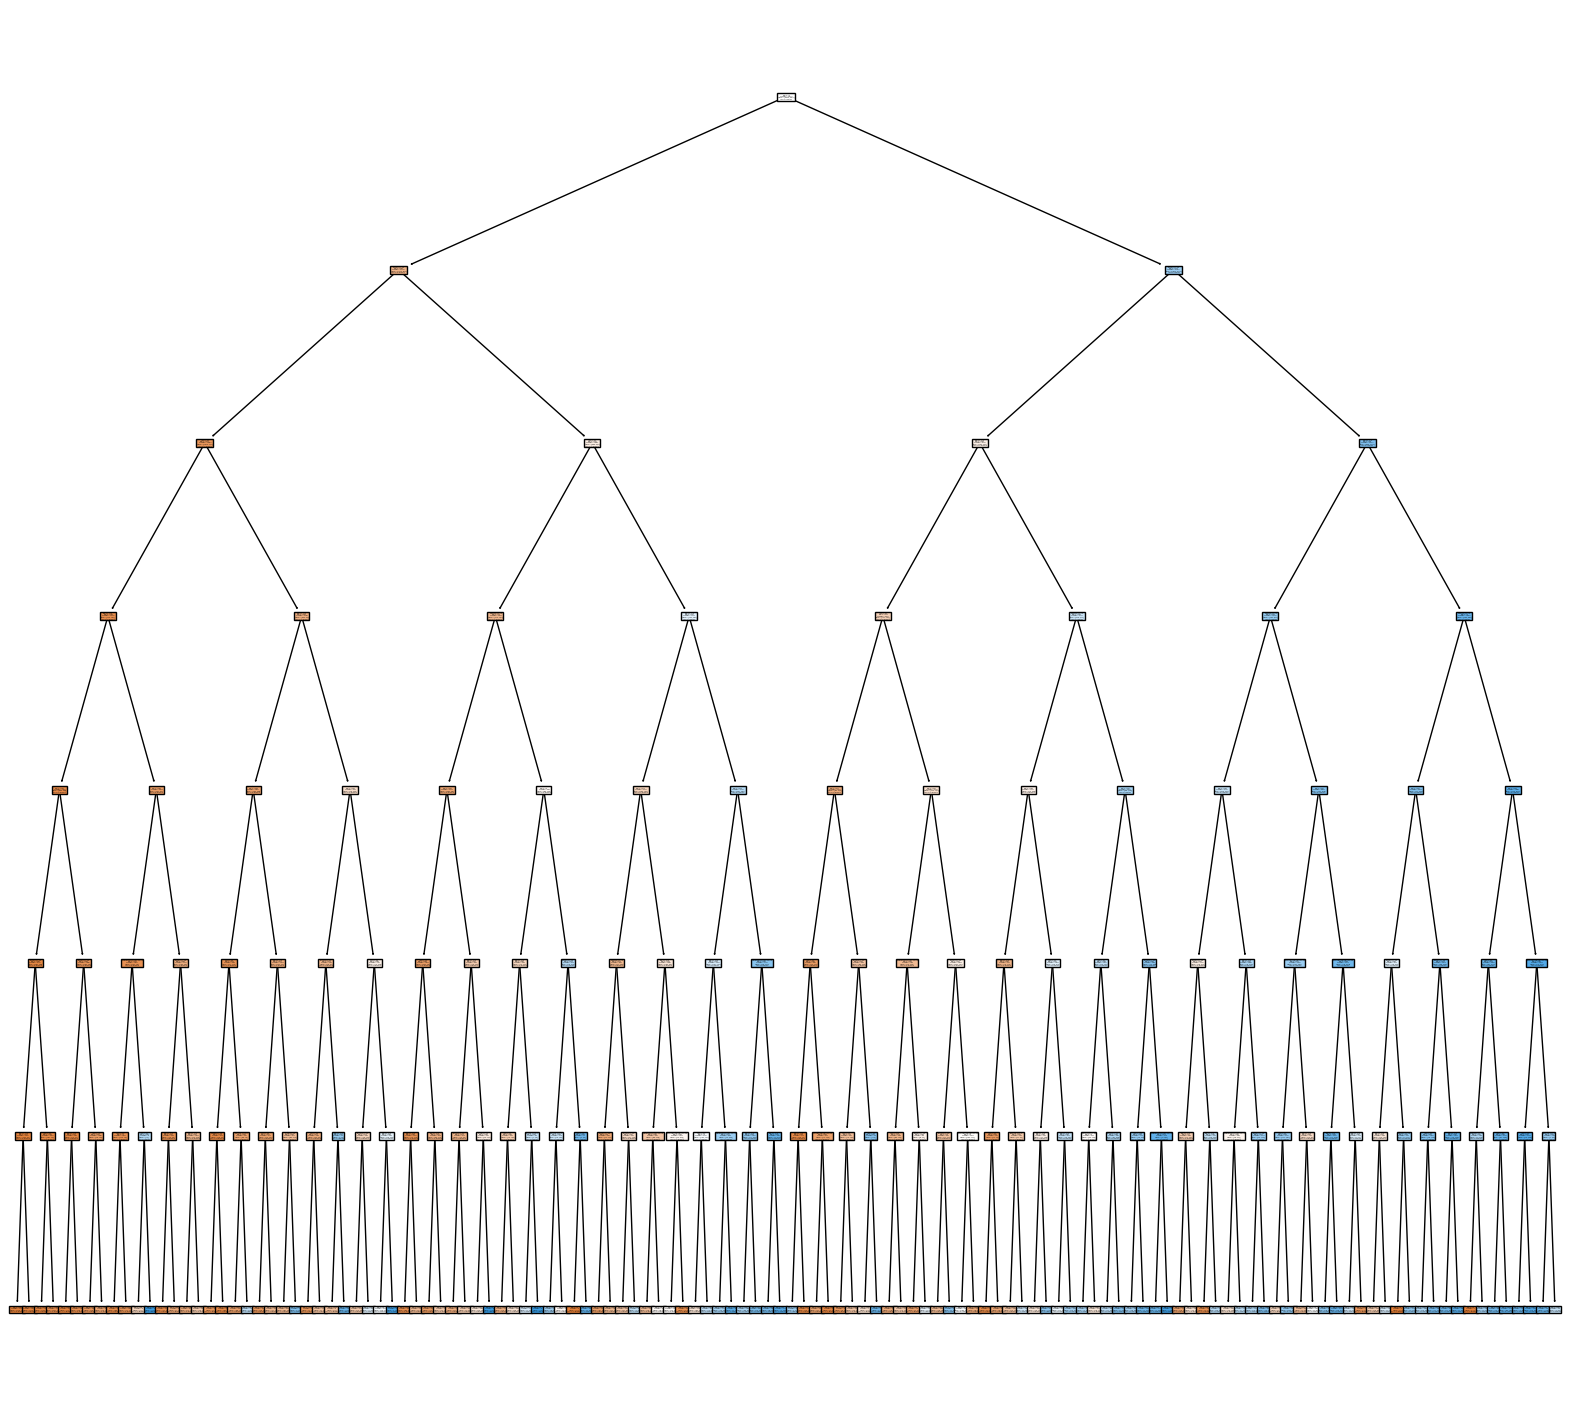

In [113]:

# plt.figure(figsize=(12,8))
# tree.plot_tree(clf_gini.fit(X_train, y_train)) 

plt.figure(figsize=(20,18))
tree.plot_tree(clf_gini, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()